# THE SPARKS FOUNDATION

# Task - 1: Prediction Using Supervised ML

# Author: K.Krishna Vamsi

<h2>Predict the percentage of an student based on the no. of hours studied.</h2>

<b>The task is divided into 8 Sections as follows:
1. Importing Packages
2. Visualising the Data
3. Building Model: Linear Regression
4. Model Training
5. Accuracy scores for Training and Testing sets
6. Score prediction of a student for a given value
7. Evaluating Model Metrics
8. Summary</b>

# Importing Packages

In [1]:
# Importing Packages
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Retreving data from source data link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Imported Data successfully")
data.head(10)

Imported Data successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Dataset Shape
data.shape

(25, 2)

In [4]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# student_score data description
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualising the Data

<b>Graph plotting for Distribution of scores for Hours studied vs Percentage score</b>

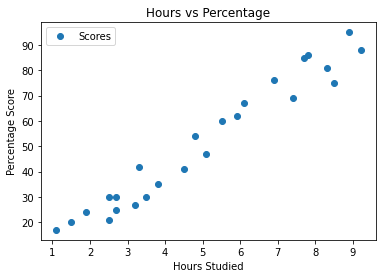

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<b>By the above graph we can see that there is a positive linear relation between the number of hours studied and percentage of score.</b>

# Model: Linear Regression

<b>Preparing data and splitting data into training and testing</b>

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

# Model Training

In [8]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

<b>As the splitting of data into train and test is completed, now we train the Linear Regression model.</b>

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training is completed.")

Training is completed.


<b>Now we plot the Regression Line for finding relationship between values X and Y.</b>

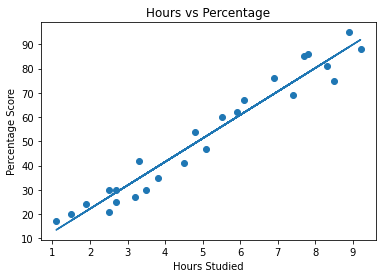

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# Accuracy scores for Training and Testing sets

In [11]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Training Score
0.9491209376364416


In [12]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [13]:
y_predict

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [14]:
y_predict[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

In [15]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


# Predicting score of a student studied for 9.25 hrs per day

In [16]:
#Let's predict the score for 9.25 hours
print('Score of student who studied for 9.25 hours per day:', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours per day: [92.38611528]


# Evalutating Model Metrics

In [17]:
# Efficiency of the model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squared Error:",mean_squ_error)
print("Mean Absolute Error:",mean_abs_error)

Mean Squared Error: 1404.2200673968694
Mean Absolute Error: 33.80918778157651


# Summary

- Given shape of the data is (25,2) with columns as hours and scores.
- Data is been splitted into 80% Training and 20% Testing to avoid overfitting of the data.
- Linear regression is used as the training and testing model because as we are dealing with 2 variables only.
- After training and testing the data, the obtained scores are
    - Training score: 94%
    - Testing score : 96%
- Obtained Mean Squared Error: 1404.2200673968694
- Botained Absolute Error: 33.80918778157651

<b>Predicting the Score of a student using the above dataset and model:</b>
- Given time period per day: 9.25 hrs

<b>The obtained score of a student who studied for 9.25 hrs/day using the above trained linear regression model is 92.38611528</b>
